# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [60]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

* PCA:
    1. PCA is able to find the strongest components within the data structure. In the dataset, it is the foremost common customer behaviors adopted. 
    2. It is able the reveal the most average and common cases in the dataset.
    
* ICA: 
    1. ICA is able to reveal the underlining structure of the dataset. In this example, it is able to find out the structure of the data. i.e. What is the dataset composed of, i.e. the segments or classes within different customers.
    2. It is able the reveal the most independent direction in the dataset.


###PCA

Components
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
Explained Variance Ratio
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


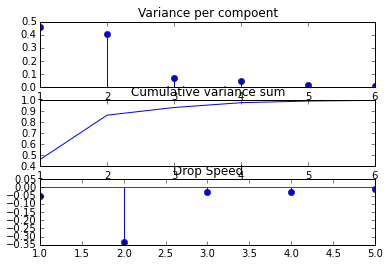

In [49]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print "Components"
print pca.components_
print "Explained Variance Ratio"
print pca.explained_variance_ratio_

cum_variance = np.cumsum(pca.explained_variance_ratio_)
derivative = np.diff(pca.explained_variance_ratio_)
plt.subplot(311)
plt.stem(range(1,7,1), pca.explained_variance_ratio_)
plt.title('Variance per compoent')
plt.subplot(312)
plt.plot(range(1,7,1), cum_variance)
plt.title('Cumulative variance sum')

plt.subplot(313)
plt.stem(range(1,6,1), derivative)
plt.title('Drop Speed')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

It drops quickly for the first 3 components. And after the third component the variance of the remaining components are subtle with no much variance change. 

I would use only the first two components. For those components contains the most prominent information covering more than 80% overall variances.

What's more, adding the third component and the rest won't do much in terms of increasing the percentage of overall variance.


In [51]:
print 'Scaled Components'
print pca.mean_
print pca.components_

Scaled Components
[ 12000.29772727   5796.26590909   7951.27727273   3071.93181818
   2881.49318182   1524.87045455]
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

Those components represent the most common customer behaviors. It is the common pattern.

By looking at the first two components, we can get the common pattern and to be adapted to this behavior.

We can use that two components as axis and to project the whole dataset onto it. Using the projected values as coordinates, those data is transformed from 6 features into 2 features. Then the dataset is more feasible to process. 

###ICA

In [63]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

data_scaled = preprocessing.scale(data)
print data_scaled 

iCA = FastICA()
iCA.fit(data_scaled)

# Print the independent components
print ica.components_

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 ..., 
 [0 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[  3.97586284e-06  -8.57963853e-07  -6.17482203e-07  -6.78046303e-07
    2.04661290e-06  -1.04674587e-06]
 [ -2.11359899e-07   1.89513801e-06  -6.36744923e-06  -4.18862218e-07
    6.71000824e-07   1.42521445e-06]
 [ -3.86339012e-07  -2.19804245e-07  -6.01960680e-07  -5.22706582e-07
    5.11675767e-07   1.80948445e-05]
 [ -3.01002057e-07   2.29496076e-06   1.20931719e-05  -1.46055003e-06
   -2.82145136e-05  -5.73492889e-06]
 [ -1.53337857e-07  -9.84688580e-06   5.80664896e-06   3.64443515e-07
   -3.30525009e-06   6.05921090e-06]
 [ -8.65317841e-07  -1.40370423e-07   7.73983936e-07   1.11467156e-05
   -5.55711041e-07  -5.95164510e-06]]


/Users/y1275963/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:145: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_
/Users/y1275963/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:158: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_1
/Users/y1275963/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:160: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr /= std_
/Users/y1275963/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:174: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise a

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [ ]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [ ]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = ?
print reduced_data[:10]  # print upto 10 elements

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = ?
print clusters

In [ ]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = ?
print centroids

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 